Метод Эйлера
i 0
x 3
y 2
z 2
delta_y None
delta_z None
y_ист 2.0
погрешность 0
погрешность Рунге-Ромберга 0.0

i 1
x 3.1
y 2.2
z 2.8
delta_y 0.20000000000000018
delta_z 0.7999999999999998
y_ист 2.2400909090909096
погрешность 0.0400909090909094
погрешность Рунге-Ромберга 0.02009090909090938

i 2
x 3.2
y 2.48
z 3.5999999999999996
delta_y 0.2799999999999998
delta_z 0.7999999999999998
y_ист 2.561333333333334
погрешность 0.08133333333333415
погрешность Рунге-Ромберга 0.041209366391184776

i 3
x 3.3000000000000003
y 2.84
z 4.416666666666666
delta_y 0.3599999999999999
delta_z 0.8166666666666664
y_ист 2.9662307692307706
погрешность 0.1262307692307707
погрешность Рунге-Ромберга 0.06452234614768759

i 4
x 3.4000000000000004
y 3.2816666666666663
z 5.260552268244576
delta_y 0.44166666666666643
delta_z 0.8438856015779095
y_ист 3.458285714285716
погрешность 0.17661904761904967
погрешность Рунге-Ромберга 0.09091216786083667

i 5
x 3.5000000000000004
y 3.8077218934911237
z 6.138601920057964
delta_y 0.

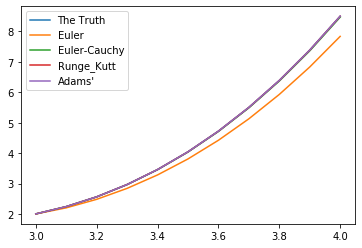

In [2]:
#    М30-221Б-18
#   Михаил Баландин

#    Вариант 9

#    Дифференцильные уравнения

#   Методы Эйлера, Эйлера-Коши, Рунге-Кутта, Адамса

#    x = [3, 4], h = 0.1

#    Начальное уравнение и начальные условия:
#    (x - 2)**2 * y'' - (x - 2) * y' - 3*y = 0
#    y(3) = 2
#    y'(3) = 2

#   После замены z = y':
#   {y' = z
#   {z' = ((x - 2) * z + 3 * y) / (x - 2)**2
#   y(3) = 2
#   z(3) = 2


#   Аналитическое решение:
#   y = (x - 2)**3 + 1 / (x - 2)


from matplotlib import pyplot as plt


interval = [3, 4]
h = 0.1
cond1 = 2
cond2 = 2

def true_func(x):
    return (x - 2)**3 + 1 / (x - 2)


def f(z):
    return z


def g(x, y, z):
    return ((x - 2) * z + 3 * y) / ((x - 2)**2)


def euler_method(f, g, interval, step, cond1, cond2):

    x_start = interval[0]
    y_start = cond1
    z_start = cond2
    y_true = true_func(x_start)

    # cохраняет x, y, z, delta_y, delta_z, y_ист, погрешность
    vals = [[x_start, y_start, z_start, None, None, y_true, 0]]

    # количество точек в которых нужно считать значения, не считая начальной
    points_overall = int((interval[1] - interval[0]) // step) + 1

    for point_number in range(points_overall):

        old_x = vals[-1][0]
        old_y = vals[-1][1]
        old_z = vals[-1][2]

        new_x = old_x + step
        new_y = old_y + step * f(old_z)
        new_z = old_z + step * g(old_x, old_y, old_z)

        delta_y = new_y - old_y
        delta_z = new_z - old_z
        true_y = true_func(new_x)
        error = abs(new_y - true_y)

        vals.append([new_x, new_y, new_z, delta_y, delta_z, true_y, error])

    return vals


def euler_cauchy_method(f, g, interval, step, cond1, cond2):

    x_start = interval[0]
    y_start = cond1
    z_start = cond2
    y_true = true_func(x_start)

    # cохраняет x, y, z, y_bar, z_bar, delta_y, delta_z, y_ист, погрешность
    vals = [[x_start, y_start, z_start, None, None, None, None, y_true, 0]]

    # количество точек в которых нужно считать значения, не считая начальной
    points_overall = int((interval[1] - interval[0]) // step) + 1

    for point_number in range(points_overall):

        old_x = vals[-1][0]
        old_y = vals[-1][1]
        old_z = vals[-1][2]

        new_x = old_x + step

        new_y_bar = old_y + step * f(old_z)
        new_z_bar = old_z + step * g(old_x, old_y, old_z)

        new_y = old_y + step/2 * (f(old_z) + f(new_z_bar))
        new_z = old_z + step/2 * (g(old_x, old_y, old_z) + g(new_x, new_y_bar, new_z_bar))

        delta_y = new_y - old_y
        delta_z = new_z - old_z
        true_y = true_func(new_x)
        error = abs(new_y - true_y)

        vals.append([new_x, new_y, new_z, new_y_bar, new_z_bar, delta_y, delta_z, true_y, error])

    return vals


def runge_kutt_method(f, g, interval, step, cond1, cond2, for_adams_method=False):

    x_start = interval[0]
    y_start = cond1
    z_start = cond2
    y_true = true_func(x_start)

    # cохраняет x, y, z, delta_y, delta_z, y_ист, погрешность
    vals = [[x_start, y_start, z_start, None, None, y_true, 0]]

    # количество точек в которых нужно считать значения, не считая начальной
    points_overall = int((interval[1] - interval[0]) // step) + 1
    if for_adams_method:
        points_overall = 4

    for point_number in range(points_overall):

        old_x = vals[-1][0]
        old_y = vals[-1][1]
        old_z = vals[-1][2]

        K1 = step * f(old_z)
        L1 = step * g(old_x, old_y, old_z)

        K2 = step * f(old_z + 1/2 * L1)
        L2 = step * g(old_x + step/2, old_y + K1/2, old_z + L1/2)

        K3 = step * f(old_z + L2/2)
        L3 = step * g(old_x + step/2, old_y + K2/2, old_z + L2/2)

        K4 = step * f(old_z + L3)
        L4 = step * g(old_x + step, old_y + K3, old_z + L3)

        delta_y = 1/6 * (K1 + 2*K2 + 2*K3 + K4)
        delta_z = 1/6 * (L1 + 2*L2 + 2*L3 + L4)

        new_x = old_x + step
        new_y = old_y + delta_y
        new_z = old_z + delta_z

        true_y = true_func(new_x)
        error = abs(new_y - true_y)

        vals.append([new_x, new_y, new_z, delta_y, delta_z, true_y, error])

    return vals


def adams_method(f, g, interval, step, cond1, cond2):
    # возьмем значения из таблицы для Рунге-Кутта
    initial_points = runge_kutt_method(f, g, interval, step, cond1, cond2, for_adams_method=True)
    # z = y' з первого уравнения, остается добавить y''
    vals = []
    for point in initial_points:
        x = point[0]
        y = point[1]
        y_prime = point[2]
        y_double_prime = g(x, y, y_prime)
        true_y = point[-2]
        error = point[-1]
        vals.append([x, y, y_prime, y_double_prime, true_y, error])

    # количество точек в которых нужно считать значения, не считая начальной
    points_overall = int((interval[1] - interval[0]) // step) - 3
    for point in range(points_overall):
        old_x = vals[-1][0]
        old_y = vals[-1][1]

        first_d1 = vals[-1][2]
        first_d2 = vals[-2][2]
        first_d3 = vals[-3][2]
        first_d4 = vals[-4][2]

        second_d1 = vals[-1][3]
        second_d2 = vals[-2][3]
        second_d3 = vals[-3][3]
        second_d4 = vals[-4][3]

        new_x = old_x + step
        new_y = old_y + step/24 * (55*first_d1 - 59*first_d2 + 37 * first_d3 - 9*first_d4)
        new_y_prime = first_d1 + step/24 * (55*second_d1 - 59*second_d2 + 37 * second_d3 - 9*second_d4)
        new_y_double_prime = g(new_x, new_y, new_y_prime)
        true_y = true_func(new_x)
        error = abs(true_y - new_y)

        vals.append([new_x, new_y, new_y_prime, new_y_double_prime, true_y, error])

    return vals


def get_points(points):
    xs = []
    ys = []
    for iteration in points:
        xs.append(iteration[0])
        ys.append(iteration[1])
    return xs, ys


def get_true_points(points):
    xs = []
    true_ys = []
    for point in points:
        xs.append(point[0])
        true_ys.append(point[-2])
    return xs, true_ys


def runge_romberg_error(method, p, k=2):
    h1 = method(f, g, interval, h, cond1, cond2)
    h2 = method(f, g, interval, h/2, cond1, cond2)

    errors = []
    for i in range(len(h1)):
        true_y = h1[i][-2]
        error = true_y - h1[i][1] + (h1[i][1] - h2[i*2][1]) / (k**p - 1)
        errors.append(error)
    return errors


points1 = euler_method(f, g, interval, h, cond1, cond2)
points2 = euler_cauchy_method(f, g, interval, h, cond1, cond2)
points3 = runge_kutt_method(f, g, interval, h, cond1, cond2)
points4 = adams_method(f, g, interval, h, cond1, cond2)

print('Метод Эйлера')
runge_romberg_errors = runge_romberg_error(euler_method, 1)
for i, point in enumerate(points1):
    print('i', i)
    print('x', point[0])
    print('y', point[1])
    print('z', point[2])
    print('delta_y', point[3])
    print('delta_z', point[4])
    print('y_ист', point[5])
    print('погрешность', point[6])
    print('погрешность Рунге-Ромберга', runge_romberg_errors[i])
    print()

print('\n\n')

print('Метод Эйлера-Коши')
runge_romberg_errors = runge_romberg_error(euler_cauchy_method, 2)
for i, point in enumerate(points2):
    print('i', i)
    print('x', point[0])
    print('y', point[1])
    print('z', point[2])
    print('y_bar', point[3])
    print('z_bar', point[4])
    print('delta_y', point[5])
    print('delta_z', point[6])
    print('y_ист', point[7])
    print('погрешность', point[8])
    print('погрешность Рунге-Ромберга', runge_romberg_errors[i])
    print()

print('\n\n')

print('Метод Рунге-Кутта')
runge_romberg_errors = runge_romberg_error(runge_kutt_method, 4)
for i, point in enumerate(points3):
    print('i', i)
    print('x', point[0])
    print('y', point[1])
    print('z', point[2])
    print('delta_y', point[3])
    print('delta_z', point[4])
    print('y_ист', point[5])
    print('погрешность', point[6])
    print('погрешность Рунге-Ромберга', runge_romberg_errors[i])
    print()

print('\n\n')

print('Метод Адамса')
runge_romberg_errors = runge_romberg_error(adams_method, 4)
for i, point in enumerate(points4):
    print('i', i)
    print('x', point[0])
    print('y', point[1])
    print('y', point[2])
    print('y\'\'', point[3])
    print('y_ист', point[4])
    print('погрешность', point[5])
    print('погрешность Рунге-Ромберга', runge_romberg_errors[i])
    print()

plt.plot(*get_true_points(points1), label='The Truth')
plt.plot(*get_points(points1), label='Euler')
plt.plot(*get_points(points2), label='Euler-Cauchy')
plt.plot(*get_points(points3), label='Runge_Kutt')
plt.plot(*get_points(points4), label='Adams\'')
plt.legend()
plt.show()
